### 1.	What are the advantages of a CNN over a fully connected DNN for image classification?

In the case of deep neural networks each neuron in a given layer is fully connected to all the neurons in the previous layer. Because of these large number of connections the number of parameters to be learned increases. As the number of parameters increases the network becomes more complex. This more complexity of the network leads to overfitting.

Especially, in the case of Image data being pixel values of the images as features, the number of input features would be of large dimension. And the most of the pixel portions of the images may not contribute in predicting the output as you can understand from the below picture. The highlighted pixel portions of the image doesn’t contribute in predicting whether it is dog or not.

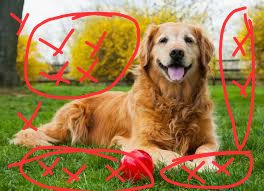

To overcome these challenges, the Convolution Neural Networks were discovered. In this, the input image data will be subjected to set of convolution operations such as filtration and max pooling. Then, the resultant data which will be of lesser dimension compared to the original image data will be subjected to Fully connected layers to predict output.

By performing the convolution operations, the dimensionality of the data shrinks significantly large. Hence, the number of parameters to be learned decreases. Hence, the network complexity decreases which leads to less chances of overfitting!

This is the reason why we use CNN’s while in the case of Image classification.

### 2.	Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and "same" padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 × 300 pixels.  What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much RAM will this network require when making a prediction for a single instance? What about when training on a mini-batch of 50 images?


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, activations
import numpy as np

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(400, kernel_size= 3, padding='same', strides=2, input_shape=(200, 300, 3)))
model.add(layers.Conv2D(200, kernel_size= 3))
model.add(layers.Conv2D(100, kernel_size= 3))


model.summary()

### 3.	If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?

1. If you are working on image classification, then you can minimize the size of your input image.

2. Use small size of filters (2x2 or 3x3) to the convolutional layer.

3. In fully connected layer minimize the number of hidden layer and neuron numbers.

4. Use overlapping pooling layer (max or average), sometimes it works so efficiently. For further reference please see the paper of AlexNet model.

5. Data type changing (that means float32 to float16) can minimize the accuracy of CNN model but it is also helpful to save memory.

6. Use mini batchs of images instead of taking all images at once

### 4.	Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

Max pooling is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.

### 5.	When would you want to add a local response normalization layer?

The local normalization tends to uniformize the mean and variance of an image around a local neighborhood. This is especially useful for correct uneven illumination or shading artifacts

### 6.	Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet, ResNet, SENet, and Xception?

The main innovation introduced by AlexNet compared to the LeNet-5 was its sheer size. AlexNet main elements are the same: a sequence of convolutional and pooling layers followed by a couple of fully-connected layers.

`Resnet`: ResNet improves the efficiency of deep neural networks with more neural layers while minimizing the percentage of errors. In other words, the skip connections add the outputs from previous layers to the outputs of stacked layers, making it possible to train much deeper networks than previously possible.

`GoogLeNet`: 1×1 convolution These convolutions used to decrease the number of parameters (weights and biases) of the architecture. By reducing the parameters we also increase the depth of the architecture. In GoogLeNet architecture, there is a method called global average pooling is used at the end of the network. This layer takes a feature map of 7×7 and averages it to 1×1. This also decreases the number of trainable parameters to 0 and improves the top-1 accuracy by 0.6%. The inception module is different from previous architectures such as AlexNet, ZF-Net. In this architecture, there is a fixed convolution size for each layer.
In the Inception module 1×1, 3×3, 5×5 convolution and 3×3 max pooling performed in a parallel way at the input and the output of these are stacked together to generated final output. The idea behind that convolution filters of different sizes will handle objects at multiple scale better.


`Xception`: The modified depthwise separable convolution is the pointwise convolution followed by a depthwise convolution.

### 7.	What is a fully convolutional network? How can you convert a dense layer into a convolutional layer?

Fully Connected Layer is simply, feed forward neural networks. Fully Connected Layers form the last few layers in the network. The input to the fully connected layer is the output from the final Pooling or Convolutional Layer, which is flattened and then fed into the fully connected layer.

A fully convolution network can be built by simply replacing the FC layers with there equivalent Conv layers.

### 8.	What is the main technical difficulty of semantic segmentation?

### 9.	Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
#from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Dropout


img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


model = Sequential()


inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)


model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=500)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

### 10.	Use transfer learning for large image classification, going through these steps:

- a.	Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow Datasets).

- b.	Split it into a training set, a validation set, and a test set.

- c.	Build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation.

- d.	Fine-tune a pretrained model on this dataset.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

  # Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)

inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [1]:
## Fine-tuning the model

In [ ]:
base_model.trainable = True


# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)